In [1]:
from utils import load_parquet_to_df_list


path = "../../../0_data/synth_pattern_data_for_synth_drive_generation"
df_list = load_parquet_to_df_list(path)

# do not use metadata of time series
df_orig = [df["dim_0"].to_frame() for df in df_list]

In [2]:
df_orig[0]

,dim_0
0,70.902463
1,70.282942
2,68.703804
3,64.193219
4,60.321183
...,...
896,79.357289
897,88.933892
898,83.036114
899,85.052833


In [3]:
from utils import z_normalize


# additionally cut of some time series for a shorter representation
df_norm = [z_normalize(df) for df in df_orig[:3]]
num_dfs = len(df_norm)

### Brute Force Algorithm

### Params for Brute Force algorithm

In [4]:
len_subsequence = 20
p = 1.0
dist_threshold = 100
num_diff_threshold = 1
ignore_trivial = True
exclusion_zone = 1

### Find motifs

In [5]:
df_norm = df_norm[0].iloc[:100]

In [6]:
from pattern_recognition.motif_discovery.brute_force.raw import do_brute_force_raw

motifs_lst, start, end = do_brute_force_raw(df_norm, len_subsequence, dist_threshold, num_diff_threshold, p, ignore_trivial, exclusion_zone)

In [10]:
motifs_lst[0]

[[0, 2, 63, 65],
 [1, 3, 64, 66],
 [44, 46, 48],
 [45, 47, 49],
 [8, 71, 73],
 [9, 72, 74],
 [4, 67],
 [5, 68],
 [6, 69],
 [7, 70],
 [24, 26],
 [25, 27],
 [28, 30],
 [29, 31],
 [32, 34],
 [33, 35],
 [36, 38],
 [37, 39],
 [40, 42],
 [41, 43],
 [75, 77],
 [76, 78]]

### Highlight motif within time series

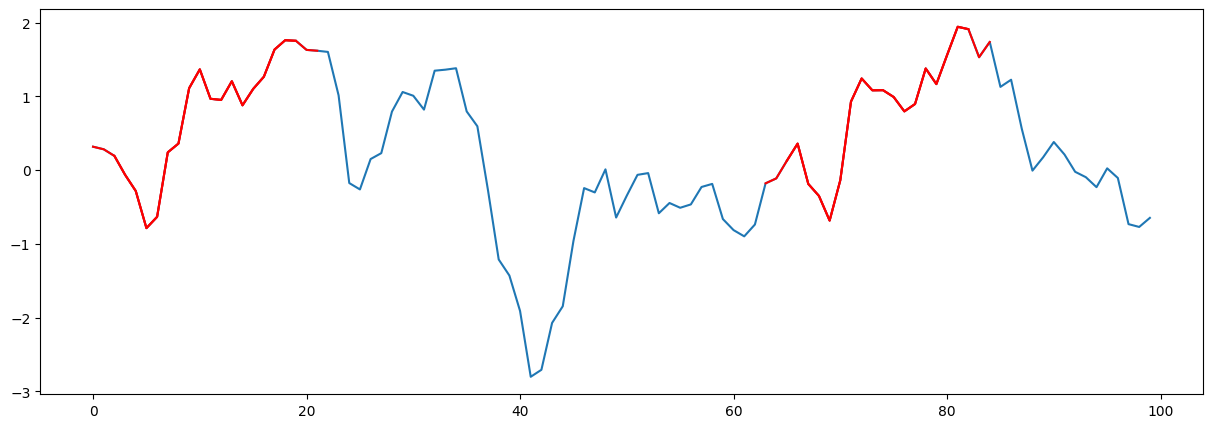

In [11]:
from pattern_recognition.motif_discovery.graphics import highlight_motif


highlight_motif(df_norm, start, end, motifs_lst[0][0], 0)